1. Функция задана таблицей:
x 0.35    0.41    0.47    0.51    0.56    0.64
y 2.73951 2.30080 1.96864 1.78776 1.59502 1.34310
Построить многочлен Лагранжа. Вычислить значение
функции в точках:
x 0.526 0.453 0.482 0.552 0.436

Многочлен Лагранжа:
-82.0647873383132*x**5 + 240.837304528744*x**4 - 292.282959296659*x**3 + 187.69664161402*x**2 - 67.6090820676545*x + 12.7584368549619
f(0.526) = 1.72247108406932
f(0.453) = 2.05438770283536
f(0.482) = 1.91148656539449
f(0.552) = 1.62372942065678
f(0.436) = 2.14634585200529


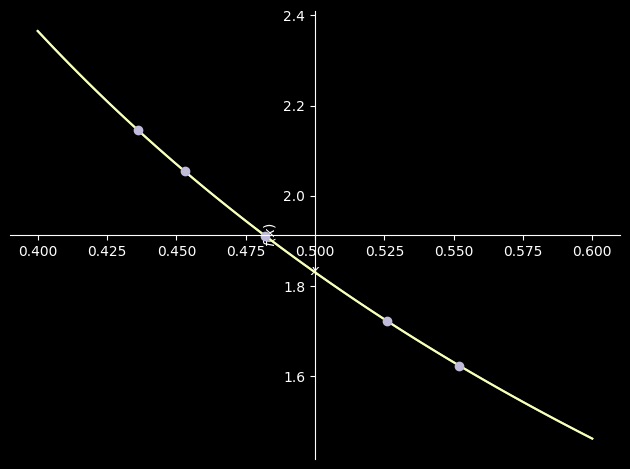

In [114]:

import numpy as np
import sympy as sm
import matplotlib.pyplot as plt

x = sm.Symbol('x') #заменим х на символ

# задаем таблицу значений
X = np.array([0.35, 0.41, 0.47, 0.51, 0.56, 0.64])
Y = np.array([2.73951, 2.30080, 1.96864, 1.78776, 1.59502, 1.34310])
#считаем по формуле из методички
result = 0
for i in range (len(X)):
    F = Y[i]
    for j in range (len(X)):
        if j!=i:
            F*= (x-X[j]) #тут у нас числитель дроби формулы в виде (x-x0)*(x-x1)*...*(x-xj)
            F/= (X[i]-X[j]) #здесь знаменатель
    result+=F
print("Многочлен Лагранжа:")
print(sm.expand(result)) #раскрываем скобки и приводим подобные


# вычисляем значения функции в заданных точках
points = [0.526, 0.453, 0.482, 0.552, 0.436]
for point in points:
    print(f"f({point}) = {result.subs(x, point)}")
    
from sympy.plotting.plot import MatplotlibBackend, Plot


def get_sympy_subplots(plot:Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.plt

# plot from sympy
x = sm.symbols('x')
p = sm.plot(result, result, (x, 0.4, 0.6), show=False)

# plot from backend
plt = get_sympy_subplots(p)
plt.plot(points, [result.subs(x, points[0]),result.subs(x, points[1]), result.subs(x, points[2]),result.subs(x, points[3]),result.subs(x, points[4])], "o")

plt.show()



2. Функция задана таблицей:
x 0.01 0.06 0.11 0.16 0.21 0.26
y 0.991824 0.951935 0.913650 0.876905 0.841638 0.807789
x 0.31 0.36 0.41 0.46 0.51 0.56
y 0.775301 0.744120 0.714193 0.685470 0.657902 0.631442
Интерполяцией вперед или назад, найти значение функции в
точках:
x 0.027 0.525 0.008 0.61


In [115]:
# задаем исходные данные
X = [0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51, 0.56]
Y = [0.991824, 0.951935, 0.913650, 0.876905, 0.841638, 0.807789, 0.775301, 0.744120, 0.714193, 0.685470, 0.657902, 0.631442]

# функция для интерполяции Лагранжа
def lagrange_interpolation(X, Y, x0):
    n = len(X)
    result = 0.0
    for i in range(n):
        term = Y[i]
        for j in range(n):
            if j != i:
                term *= (x0 - X[j]) / (X[i] - X[j])
        result += term
    return result

# находим значения функции в заданных точках
t = [0.027, 0.525, 0.008, 0.61]


y1 = lagrange_interpolation(X, Y, t[0])
y2 = lagrange_interpolation(X, Y, t[1])
y3 = lagrange_interpolation(X, Y, t[2])
y4 = lagrange_interpolation(X, Y, t[3])

# выводим результаты
print(f"Значение функции в точке {t[0]} равно {y1:.6f}")
print(f"Значение функции в точке {t[1]} равно {y2:.6f}")
print(f"Значение функции в точке {t[2]} равно {y3:.6f}")
print(f"Значение функции в точке {t[3]} равно {y4:.6f}")


Значение функции в точке 0.027 равно 0.978079
Значение функции в точке 0.525 равно 0.649849
Значение функции в точке 0.008 равно 0.993453
Значение функции в точке 0.61 равно 0.606227


In [116]:
import math


#функция для подсчёта конечных разностей
def razn(buff):
    deltaY = []
    for i in range(1,len(buff)):
        delta_y = buff[i]-buff[i-1] #тут будет выходить сначала deltaY0, затем deltaY1 и т.д.
        deltaY.append(delta_y)
    return deltaY

result = Y[0]
buff = Y
h = X[1]-X[0] #по формуле из методички

for i in range(1, len(Y)):
    buff = razn(buff)
    F = buff[0]/(math.factorial(i)*(h**i)) #по формуле; т.е. тут будет например deltaY0/h, delta2Y0/(2!h^2), delta3Y0/(3!h^3) и т.д.
    for j in range(i):
        F*=(x-X[j])
    result += F #выйдет расчёт по формуле Y0+(deltaY0/h)(x-x0)+(delta2Y0/(2!h^2))(x-x0)(x-x1)+...

print("Многочлен Ньютона:")
print(sm.expand(result))



Многочлен Ньютона:
395.061728397308*x**11 - 1206.06701940866*x**10 + 1602.03174604648*x**9 - 1215.43449737032*x**8 + 581.332562973909*x**7 - 182.583600479037*x**6 + 38.0482874570731*x**5 - 5.17735324241267*x**4 + 0.355149160330453*x**3 + 0.31464502747821*x**2 - 0.820441413674788*x + 0.999996642630434


Значение функции в т. 0.027 равно 0.978078820593734
Значение функции в т. 0.525 равно 0.649848770214503
Значение функции в т. 0.008 равно 0.993453410432827
Значение функции в т. 0.61 равно 0.606227000000005


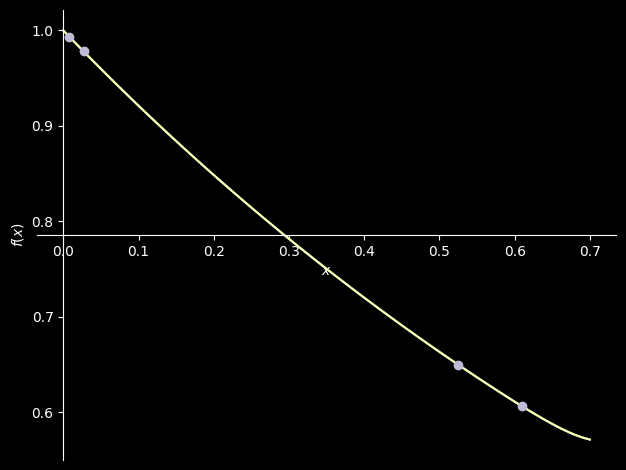

In [117]:
#вычисляем значения функции при данных значениях аргумента
for i in range(len(t)):
    print("Значение функции в т.", t[i], "равно", result.subs(x, t[i])) #для вычисления испльзуем subs
    
# plot from sympy
# x = sm.symbols('x')
p = sm.plot(result, result, (x, 0, 0.7), show=False)

# plot from backend
plt = get_sympy_subplots(p)
plt.plot(t, [result.subs(x, t[0]), result.subs(x, t[1]), result.subs(x, t[2]), result.subs(x, t[3])], "o")

plt.show()

3. Для функции y=ln( x+1) составьте таблицу из 10
значений на отрезке [2.9 ;3.1] . Постройте любой интерполяционный многочлен. Вычислите значение в произвольной точке и
оцените погрешность вычисления.

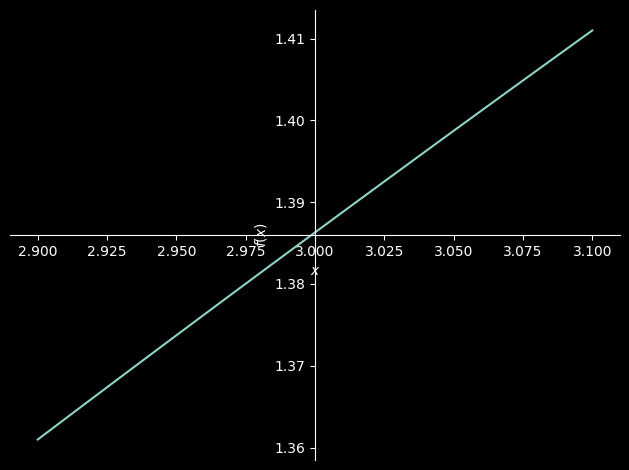

0.000141143798828125*x**9 - 0.0057373046875*x**8 + 0.0712890625*x**7 - 0.453125*x**6 + 2.03125*x**5 - 5.5*x**4 + 15.25*x**3 - 15.0*x**2 + 18.5*x - 2.375
Значение многочлена в точке x=3.05 равно y=1.3987168811184474
Точное значение функции в точке x=3.05 равно y=1.3987168811184478
Погрешность вычисления равна 4.440892098500626e-16


In [118]:

from scipy.interpolate import lagrange

# Определяем функцию
def f(x):
    return np.log(x + 1)

# Задаем отрезок и количество узлов
a, b = 2.9, 3.1
n = 10

# Генерируем узлы и значения функции в них
x = np.linspace(a, b, n)
y = f(x)

# Строим интерполяционный многочлен Лагранжа
poly = lagrange(x, y)

xx = sm.Symbol('x')
result = 0.0

for i in range (10):
    F = y[i]
    for j in range (10):
        if j!=i:
            F*= (xx-x[j]) #тут у нас числитель дроби формулы в виде (x-x0)*(x-x1)*...*(x-xj)
            F/= (x[i]-x[j]) #здесь знаменатель
    result+=F
sm.plot(result, (xx, 2.9, 3.1))
print(sm.expand(result)) #раскрываем скобки и приводим подобные


# Определяем точку, в которой нужно вычислить значение многочлена
x0 = 3.05

# Вычисляем значение многочлена в заданной точке
y0 = poly(x0)
poly1 = lagrange_interpolation(x,y,x0)
# Вычисляем точное значение функции в заданной точке
y_exact = f(x0)

# Вычисляем погрешность вычисления
error = abs(poly1 - y_exact)

# Выводим результаты
print(f"Значение многочлена в точке x={x0} равно y={poly1}")
print(f"Точное значение функции в точке x={x0} равно y={y_exact}")
print(f"Погрешность вычисления равна {error}")
